In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Gradient Descent Ridge Regression
def GD_Rregression(y,X,alpha,tol,lam) : 
    
    N = len(X);
    p = len(X[0]) #Number of columns in X
    beta = np.zeros([p,1]);
    y = y.reshape(N,1)
    err =1.0;
    iterations=0;
    
    #Gradient Descent Method
    while err > tol:
        J = (np.transpose(X.dot(beta)-y).dot(X.dot(beta)-y))+(lam*(np.transpose(beta).dot(beta)));
        gradient = (np.transpose(X.dot(beta)-y).dot(X))
        gradient = (np.transpose(X.dot(beta)-y).dot(X));
        gradient = np.transpose(gradient)+((lam*beta));
        beta =beta - ((alpha/N)*2*(gradient));
        err = np.absolute(J-(np.transpose(X.dot(beta)-y).dot(X.dot(beta)-y)))-(lam*(np.transpose(beta).dot(beta)));
    return beta


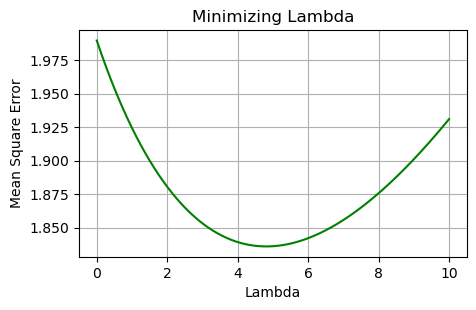

In [7]:
file = np.loadtxt(open("X.csv"), delimiter=",")
X = file
file = np.loadtxt(open("y.csv"), delimiter=",")
y = file

p = (len(X[1,:])); #Number features (X columns)
N = (len(y));      #Number of data points

#Train model with 70% of the values
XTrain = X[0:70,:];
yTrain = y[0:70];

#Test model with 30% of the values
XTest = X[70:100,:];
yTest= y[70:100];

MSE = np.zeros([1000,1]); 
L = np.zeros([1000,1]);

for i in range(0,1000):
    lamb = i/100;
    transX = np.transpose(XTrain);
    beta = np.linalg.inv((transX.dot(XTrain))+lamb*np.identity(p));
    beta = beta.dot(transX);
    beta = beta.dot(yTrain);
    #beta = GD_Rregression(yTrain,XTrain,0.1,1e-9,lamb)
    yHat = XTest.dot(beta)
    L[i] = lamb
    #MSE[i] = np.mean((yHat-yTest)**2)  #Calculating the mean of (yHat[k]-yTest[k])**2
    suma =0
    #We now calculate the mean in a for loop because with the abalytical beta we get an array of 30 elements
    #And with gradient descent we get a matrix of 30 by 1
    for k in range(len(yHat)): # Calculating the mean of (yHat[k]-yTest[k])**2
        suma = suma + (yHat[k]-yTest[k])**2
    MSE[i] = suma/len(yHat)

    
plot0 = plt.figure(0,figsize=(5,3), dpi=100)
plt.title('Minimizing MSE')
plt.plot(L,MSE,'g' )
plt.xlabel('Lambda')
plt.ylabel('Mean Square Error')
plt.grid()
plt.show()


In [ ]:
#We can observe that the optimal value of lambda that minimizes the error will be arround 4.7